#Curso de bioinformática para profesionales de la salud: Patogenos respiratorios


##Práctica Módulo 1. Control de calidad secuencias crudas: Secuencias cortas y Secuencias largas


##1. Instalación la plataforma conda/mamba

In [1]:
#Instale de la plataforma conda/mamba y dependencias de conda/mamba en colab
#!pip install -q condacolab
#Instalación cuda-version-12 para resolver error cuda_12.2.*
!pip install -U https://github.com/conda-incubator/condacolab/archive/cuda-version-12.tar.gz
import condacolab
condacolab.install()
!pip install --upgrade --force-reinstall zstandard

     \ 35.4 kB 1.9 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for condacolab: filename=condacolab-0.1.7-py3-none-any.whl size=7216 sha256=62e70a6d7a700e2b92bb32fcd312b4af57819e5d67823a92299ec8a945ac54cc
  Stored in directory: /root/.cache/pip/wheels/40/52/76/1ad2aa50f9ab880cfc0e418db37f474f468d2920eab048baa2
Successfully built condacolab
⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 45.8 MB/s eta 0:00:00
  Attempting uninstall: zstandard
    Found existing installation: zstandard 0.19.0
    Uninstalling zstandard-0.19.0:
      Successfully uninstalled zstandard-0.19.0


In [1]:
import condacolab
condacolab.install()
!pip install --upgrade --force-reinstall zstandard

✨🍰✨ Everything looks OK!
  Using cached zstandard-0.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.4 MB)
  Attempting uninstall: zstandard
    Found existing installation: zstandard 0.22.0
    Uninstalling zstandard-0.22.0:
      Successfully uninstalled zstandard-0.22.0


In [2]:
#Revise la lista de ambientes que vienen por defecto en conda/mamba
!mamba env list

# conda environments:
#
base                     /usr/local



###Para más información consulte la documentación:
[conda](https://conda.io/projects/conda/en/latest/user-guide/install/index.html)

[mamba](https://mamba.readthedocs.io/en/latest/)

##2. Cree un ambiente conda/mamba con los programas  necesarias para realizar el ejercicio de control de calidad de las secuencias

In [3]:
#Cree un nuevo ambiente conda/mamba
!mamba create -n QC


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.1) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: []

Preparing transaction: - done
Verifying transaction: | / - done
Executing transaction: |

In [4]:
#Revise que el ambiente fue creado y se encuentra en la lista
!mamba env list

# conda environments:
#
base                     /usr/local
QC                       /usr/local/envs/QC



In [5]:
#Active el ambiente que acabo de crear
!mamba activate QC

Run 'mamba init' to be able to run mamba activate/deactivate
and start a new shell session. Or use conda to activate/deactivate.



In [6]:
#Revise en el listado de programas si encuentra los programas fastqc, multiqc, fastp o nanofilt
!mamba list

# packages in environment at /usr/local:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
brotlipy                  0.7.0           py310h5764c6d_1005    conda-forge
bzip2                     1.0.8                h7f98852_4    conda-forge
c-ares                    1.18.1               h7f98852_0    conda-forge
ca-certificates           2022.12.7            ha878542_0    conda-forge
certifi                   2022.12.7          pyhd8ed1ab_0    conda-forge
cffi                      1.15.1          py310h255011f_3    conda-forge
charset-normalizer        3.1.0              pyhd8ed1ab_0    conda-forge
colorama                  0.4.6              pyhd8ed1ab_0    conda-forge
conda                     23.1.0          py310hff52083_0    conda-forge
conda-package-handling    2.0.2              pyh38be061_0    conda-forge
conda-packa

In [7]:
#Instale las dependencias necesarias para los pasos posteriores de control de calidad de secuencias
#conda-forge y bioconda son canales donde se enecuentran herramientas y programas
#fastqc programa de calidad short reads
#multiqc programa de calidad short reads múltiples secuencias
#fastp selección de secuencias por puntaje phred
#nanofilt selección de secuencias por puntaje Q
!mamba install -c bioconda fastqc multiqc fastp nanofilt --quiet

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [8]:
#Verifique en el listado que se encuentren los programas fastqc, multiqc, fastp y nanofilt
!mamba list

# packages in environment at /usr/local:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
alsa-lib                  1.2.9                hd590300_0    conda-forge
biopython                 1.83            py310h2372a71_0    conda-forge
brotli                    1.1.0                hd590300_1    conda-forge
brotli-bin                1.1.0                hd590300_1    conda-forge
brotlipy                  0.7.0           py310h5764c6d_1005    conda-forge
bzip2                     1.0.8                h7f98852_4    conda-forge
c-ares                    1.18.1               h7f98852_0    conda-forge
ca-certificates           2023.11.17           hbcca054_0    conda-forge
cairo                     1.16.0            hbbf8b49_1016    conda-forge
certifi                   2023.11.17         pyhd8ed1ab_0    conda-forge
cffi       

###Para más información consulte la documentación:

[fastqc](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/)

[multiqc](https://multiqc.info/docs/)

[fastp](https://github.com/OpenGene/fastp)

[nanofilt](https://github.com/wdecoster/nanofilt)

##3. Realice el análisis de calidad de las secuencias Illumina

In [9]:
#Cree un directorio para las secuencias crudas
!mkdir fastqs_illumina

In [10]:
#Descarge del repositorio de NCBI las secuencias crudas
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR260/063/SRR26037363/SRR26037363_1.fastq.gz

--2024-01-16 15:37:23--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR260/063/SRR26037363/SRR26037363_1.fastq.gz
           => ‘SRR26037363_1.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.165|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR260/063/SRR26037363 ... done.
==> SIZE SRR26037363_1.fastq.gz ... 18727287
==> PASV ... done.    ==> RETR SRR26037363_1.fastq.gz ... done.
Length: 18727287 (18M) (unauthoritative)

SRR26037363_1.fastq 100%[===================>]  17.86M  12.1MB/s    in 1.5s    

2024-01-16 15:37:26 (12.1 MB/s) - ‘SRR26037363_1.fastq.gz’ saved [18727287]



In [ ]:
#Descarge del otros repositorios
!wget https://github.com/diseasesdetectives/Curso_Bioinformatica_para_profesionales_de_la_salud_publica/data_curso/prueba_fastqc.fastq.gz

In [11]:
#Mueva los archivos de secuencias crudas al directorio creado previamente
!mv SRR26037363_1.fastq.gz ./fastqs_illumina/
#!mv prueba_fastqc.fastq.gz ./fastqs_illumina/

In [12]:
#Cree el directorio para la salida del programa fastqc
!mkdir fastqc_output

In [13]:
#Corra el análisis de calidad usando el programa fastqc
!fastqc fastqs_illumina/SRR26037363_1.fastq.gz -o fastqc_output
#!fastqc fastqs_illumina/prueba_fastqc.fastq.gz -o fastqc_output

application/gzip
Started analysis of SRR26037363_1.fastq.gz
Approx 5% complete for SRR26037363_1.fastq.gz
Approx 10% complete for SRR26037363_1.fastq.gz
Approx 15% complete for SRR26037363_1.fastq.gz
Approx 20% complete for SRR26037363_1.fastq.gz
Approx 25% complete for SRR26037363_1.fastq.gz
Approx 30% complete for SRR26037363_1.fastq.gz
Approx 35% complete for SRR26037363_1.fastq.gz
Approx 40% complete for SRR26037363_1.fastq.gz
Approx 45% complete for SRR26037363_1.fastq.gz
Approx 50% complete for SRR26037363_1.fastq.gz
Approx 55% complete for SRR26037363_1.fastq.gz
Approx 60% complete for SRR26037363_1.fastq.gz
Approx 65% complete for SRR26037363_1.fastq.gz
Approx 70% complete for SRR26037363_1.fastq.gz
Approx 75% complete for SRR26037363_1.fastq.gz
Approx 80% complete for SRR26037363_1.fastq.gz
Approx 85% complete for SRR26037363_1.fastq.gz
Approx 90% complete for SRR26037363_1.fastq.gz
Approx 95% complete for SRR26037363_1.fastq.gz
Analysis complete for SRR26037363_1.fastq.gz



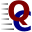
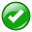
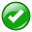
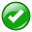
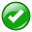
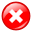
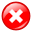
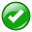
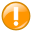
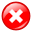
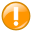
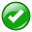
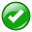
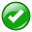
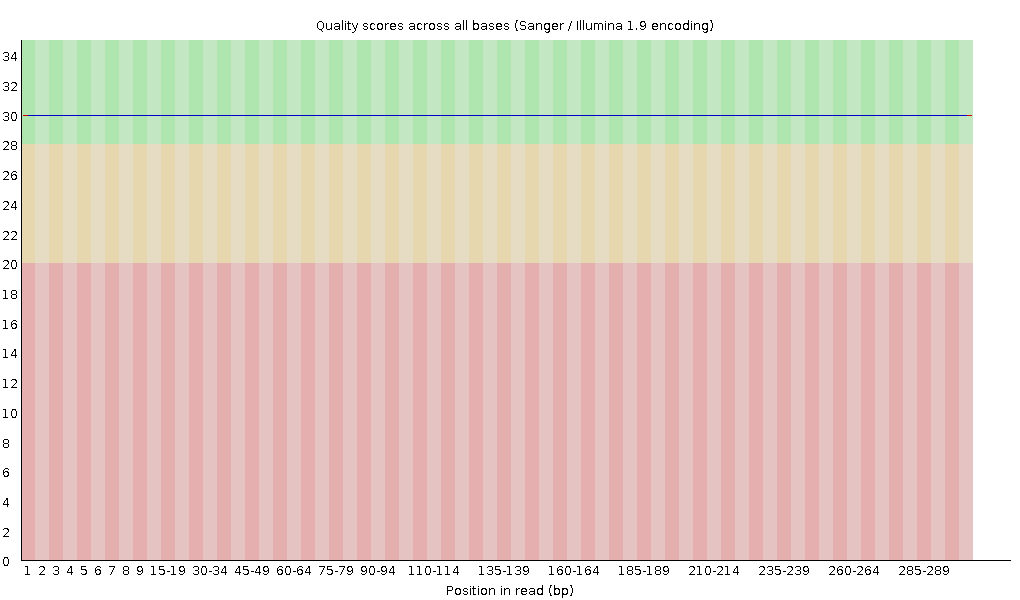
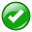
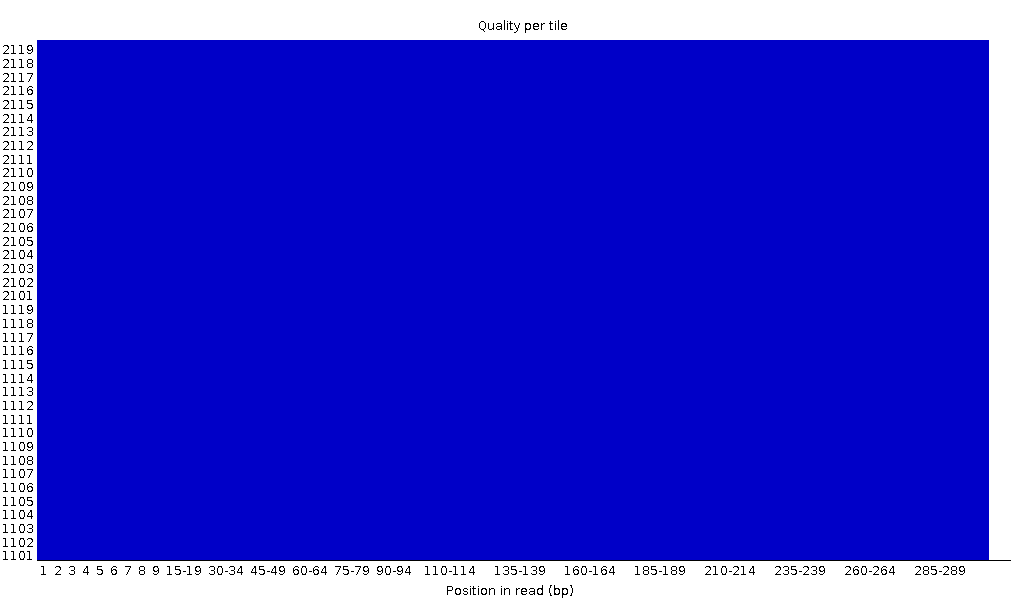
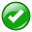
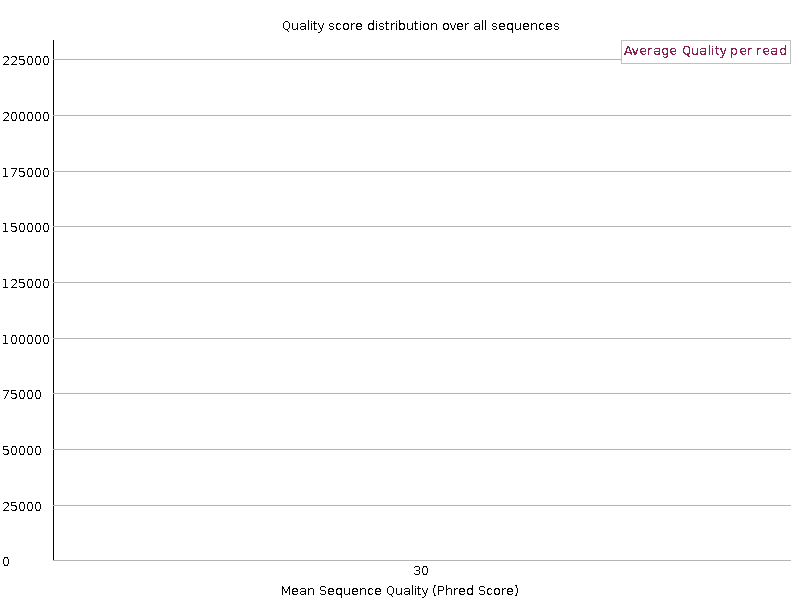
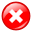
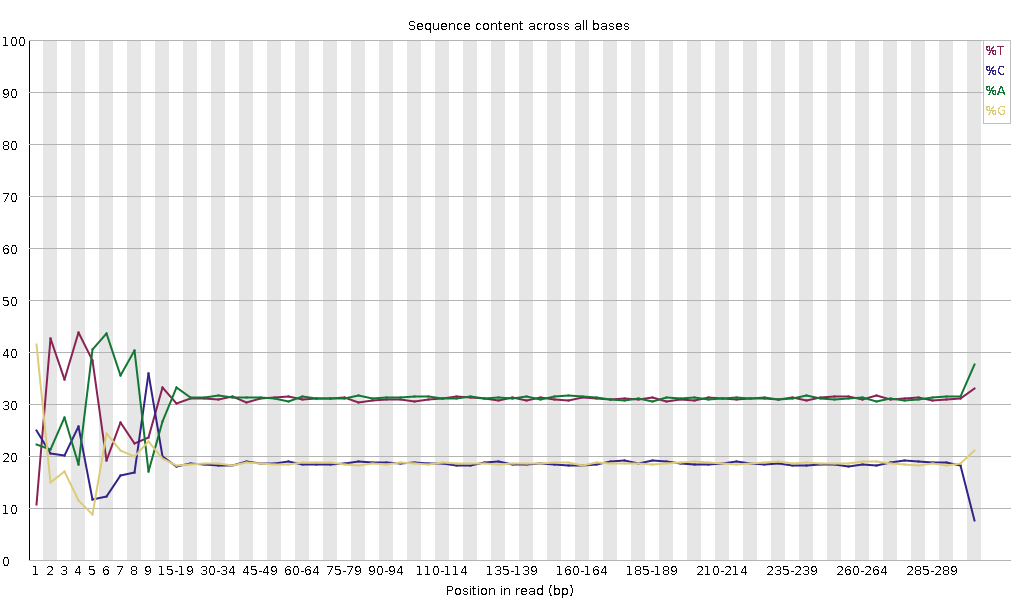
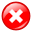
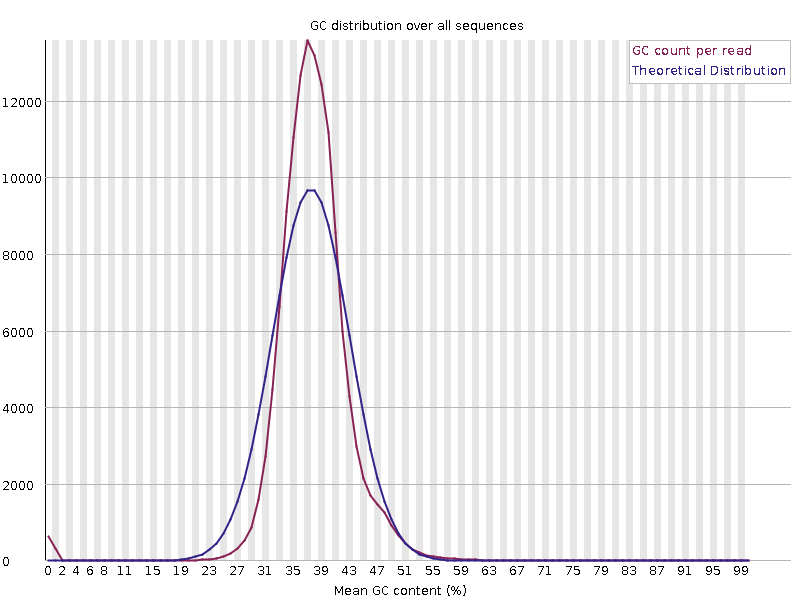
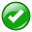
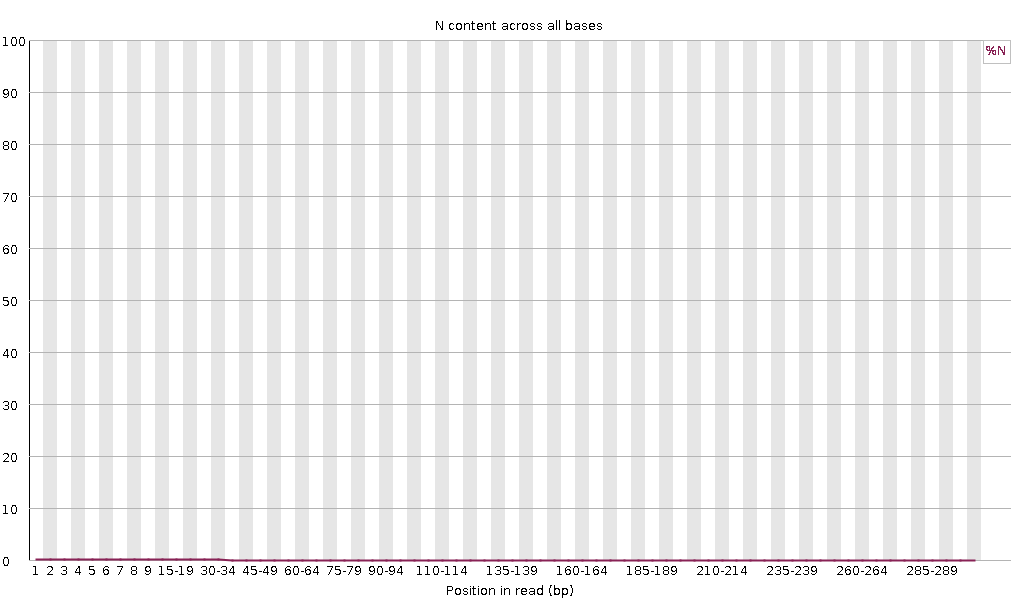
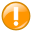
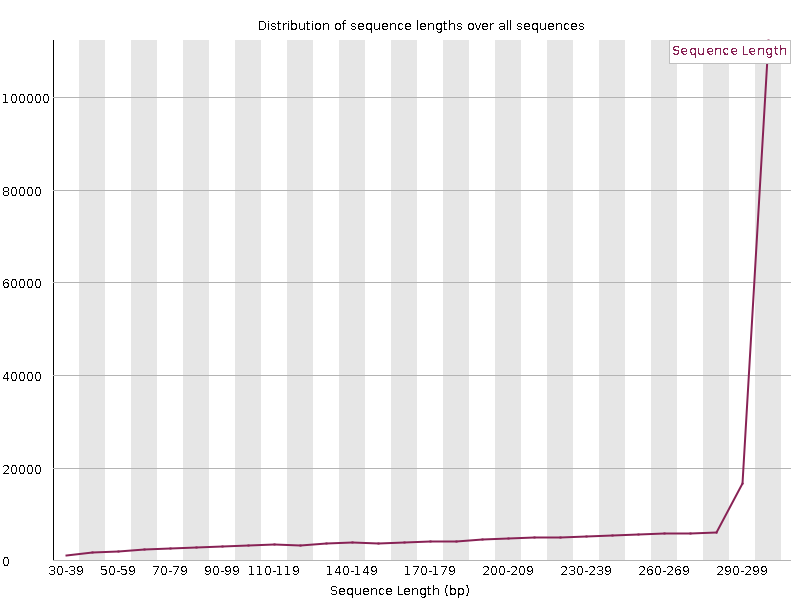
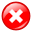
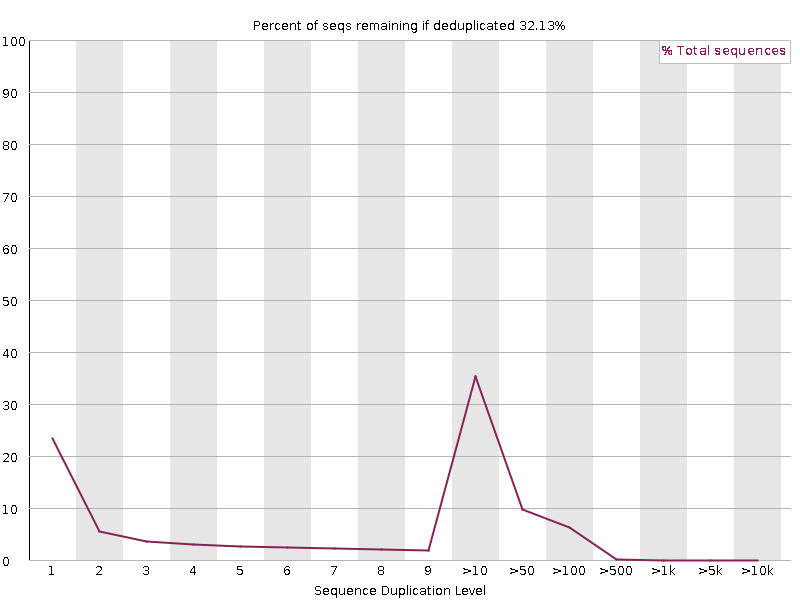
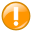
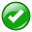
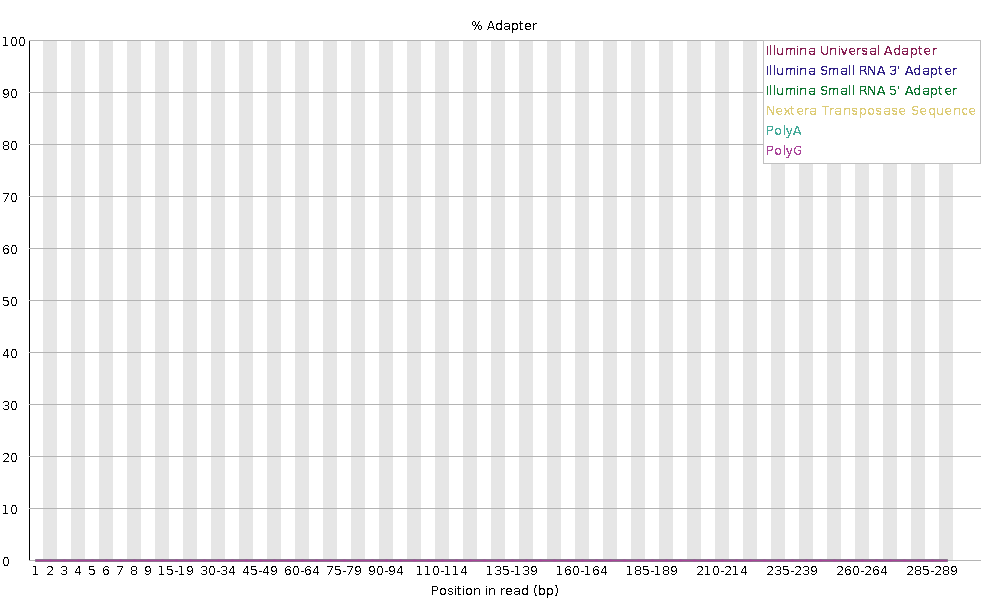

In [14]:
#Descarge el archivo .html del directorio fastqc_output y de doble click
#o visualice con el código Python
import IPython
IPython.display.HTML(filename='/content/fastqc_output/SRR26037363_1_fastqc.html')

##4. Realice el filtrado de las secuencias del archivo "bad_sequences.fastq" por calidad phred=20

In [18]:
#Cree el directorio para la salida de fastp
!mkdir trimmed_fastqs

In [19]:
#Filtrado de las secuencias por calidad
!fastp -i ./fastqs_illumina/SRR26037363_1.fastq.gz --detect_adapter_for_pe -o ./trimmed_fastqs/SRR26037363_1.fq.gz -h ./trimmed_fastqs/SRR26037363_1.html --qualified_quality_phred 20

Detecting adapter sequence for read1...
No adapter detected for read1

Read1 before filtering:
total reads: 233432
total bases: 58019298
Q20 bases: 58019298(100%)
Q30 bases: 58019298(100%)

Read1 after filtering:
total reads: 232723
total bases: 57975683
Q20 bases: 57975683(100%)
Q30 bases: 57975683(100%)

Filtering result:
reads passed filter: 232723
reads failed due to low quality: 0
reads failed due to too many N: 709
reads failed due to too short: 0
reads with adapter trimmed: 0
bases trimmed due to adapters: 0

Duplication rate (may be overestimated since this is SE data): 14.5524%

JSON report: fastp.json
HTML report: ./trimmed_fastqs/SRR26037363_1.html

fastp -i ./fastqs_illumina/SRR26037363_1.fastq.gz --detect_adapter_for_pe -o ./trimmed_fastqs/SRR26037363_1.fq.gz -h ./trimmed_fastqs/SRR26037363_1.html --qualified_quality_phred 20 
fastp v0.23.4, time used: 20 seconds


##5. Realice el análisis de calidad de las secuencias nanopore


In [20]:
#Descargue desde el repositorio en EBI la secuencia cruda nanopore
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR144/083/SRR14475083/SRR14475083_1.fastq.gz

--2024-01-16 15:44:36--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR144/083/SRR14475083/SRR14475083_1.fastq.gz
           => ‘SRR14475083_1.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.165|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR144/083/SRR14475083 ... done.
==> SIZE SRR14475083_1.fastq.gz ... 765605781
==> PASV ... done.    ==> RETR SRR14475083_1.fastq.gz ... done.
Length: 765605781 (730M) (unauthoritative)

SRR14475083_1.fastq 100%[===================>] 730.14M  29.9MB/s    in 26s     

2024-01-16 15:45:03 (27.9 MB/s) - ‘SRR14475083_1.fastq.gz’ saved [765605781]



In [ ]:
#Descarge el archivo de calidad de la corrida de nanopore
!wget https://github.com/diseasesdetectives/Curso_Bioinformatica_para_profesionales_de_la_salud_publica/data_curso/sequencing_summary.txt

In [ ]:
# Cree un directorio y mueva los archivos nanopore al directorio
!mkdir fastqs_nanopore
!mv SRR14475083_1.fastq.gz ./fastqs_nanopore
!mv sequencing_summary.txt ./fastqs_nanopore

In [21]:
#Decarge el programa de calidad de secuencias para nanopore
!wget https://raw.githubusercontent.com/roblanf/minion_qc/master/MinIONQC.R -O MinIONQC.R

--2024-01-16 15:49:09--  https://raw.githubusercontent.com/roblanf/minion_qc/master/MinIONQC.R
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43894 (43K) [text/plain]
Saving to: ‘MinIONQC.R’

MinIONQC.R          100%[===================>]  42.87K  --.-KB/s    in 0.01s   

2024-01-16 15:49:09 (4.00 MB/s) - ‘MinIONQC.R’ saved [43894/43894]



In [24]:
#Revise la versión de R. Para salir del modo consola escriba q() y luego n
!R version

ARGUMENT 'version' __ignored__


R version 4.3.2 (2023-10-31) -- "Eye Holes"
Copyright (C) 2023 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> q()
Save workspace image? [y/n/c]: n


In [25]:
# Cargue R para poder correr el programa de calidad de nanopore
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'

In [26]:
#Instale las librerias de R necesarias para correr MinIONQC
%%R
install.packages(c("data.table",
                   "futile.logger",
                   "ggplot2",
                   "optparse",
                   "plyr",
                   "readr",
                   "reshape2",
                   "scales",
                   "viridis",
                   "yaml"))

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘getopt’, ‘Rcpp’, ‘gridExtra’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/formatR_1.14.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 96077 bytes (93 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]

In [27]:
#Corra el programa de calidad de las secuencias nanopore
!Rscript MinIONQC.R -i sequencing_summary.txt -o minion_output -p 2

INFO [2024-01-16 15:56:48] Loading input file: sequencing_summary.txt
INFO [2024-01-16 15:56:49] MinION flowcell detected
INFO [2024-01-16 15:56:51] .: creating output directory:minion_output/.
INFO [2024-01-16 15:56:51] .: summarising input file for flowcell
INFO [2024-01-16 15:56:51] .: plotting length histogram
INFO [2024-01-16 15:56:53] .: plotting mean Q score histogram
INFO [2024-01-16 15:56:54] .: plotting flowcell overview
INFO [2024-01-16 15:57:15] .: plotting flowcell yield over time
INFO [2024-01-16 15:57:17] .: plotting flowcell yield by read length
INFO [2024-01-16 15:57:18] .: plotting sequence length over time
INFO [2024-01-16 15:57:33] .: plotting Q score over time
INFO [2024-01-16 15:57:39] .: plotting reads per hour
INFO [2024-01-16 15:57:39] .: plotting read length vs. q score scatterplot
INFO [2024-01-16 15:57:43] .: plotting flowcell channels summary histograms
INFO [2024-01-16 15:57:45] .: plotting physical overview of output per channel


Para mayor información consulte la documentación:

[MinIONQC.R](https://github.com/roblanf/minion_qc)

##6. Realice el filtrado de las secuencias del archivo "SRR14475083_1.fastq.gz" por lonquitud > 500

In [28]:
!NanoFilt -h

usage: NanoFilt [-h] [-v] [--logfile LOGFILE] [-l LENGTH] [--maxlength MAXLENGTH] [-q QUALITY]
                [--minGC MINGC] [--maxGC MAXGC] [--headcrop HEADCROP] [--tailcrop TAILCROP]
                [-s SUMMARY] [--readtype {1D,2D,1D2}]
                [input]

Perform quality and/or length and/or GC filtering of (long read) fastq data.           Reads on stdin.

General options:
  -h, --help            show the help and exit
  -v, --version         Print version and exit.
  --logfile LOGFILE     Specify the path and filename for the log file.
  input                 input, uncompressed fastq file

Options for filtering reads on.:
  -l LENGTH, --length LENGTH
                        Filter on a minimum read length
  --maxlength MAXLENGTH
                        Filter on a maximum read length
  -q QUALITY, --quality QUALITY
                        Filter on a minimum average read quality score
  --minGC MINGC         Sequences must have GC content >= to this. Float between 0.0 and 

In [29]:
! gunzip -c SRR14475083_1.fastq.gz | NanoFilt -l 500 | gzip > Nanopore_500.fastq.gz

##7. Prueba Módulo_1

In [ ]:
#Descarge las secuencias crudas para el ejercicio
!wget https://github.com/diseasesdetectives/Curso_Bioinformatica_para_profesionales_de_la_salud_publica/data_curso/exercise.zip

In [ ]:
#Descomprima el directorio "exercise"
!unzip exercise

In [ ]:
#Liste las 4 secuencias para el análisis "sample_1-4"
!

In [ ]:
#muevase a la crapeta de trabajo exercise
!

In [ ]:
#Active el ambiente mamba de calidad de las secuencias que se creo previamente
!

In [ ]:
#En este espacio realice el análisis de calidad de la secuencia sample_1
#Si es necesario realice el filtrado por calidad o longitud de secuencias
!

In [ ]:
#En este espacio realice el análisis de calidad de la secuencia sample_2
#Si es necesario realice el filtrado por calidad o longitud de secuencias
!

In [ ]:
#En este espacio realice el análisis de calidad de la secuencia sample_3
#Si es necesario realice el filtrado por calidad o longitud de secuencias
!

In [ ]:
#En este espacio realice el análisis de calidad de la secuencia sample_4
#Si es necesario realice el filtrado por calidad o longitud de secuencias
!

##Para cumplir con la prueba de este módulo deberá subir en la plataforma Learning manage system (LMS) sección prueba Módulo_1, los archivos de reporte de calidad "fastqc.html" finales, en caso de realizar algún filtrado por favor vuelva a correr el programa de calidad del archivo filtrado y suba solo el último reporte.

#FIN DEL EJERCICIO




Alguna de la información aquí presentada proviene de cursos pasados desarrollados por el Wellcome connecting science (WCS) en el marco del proyecto COG-TRAIN

https://github.com/WCSCourses/COG-Train_Resources